In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [15]:
df = pd.read_csv("dataset.txt")
df.head()

,date,product_id,sales,price,promotion
0,2023-01-01,A101,120,10,1
1,2023-01-02,A101,135,10,0
2,2023-01-03,A101,150,11,1
3,2023-01-04,A101,160,11,0


In [16]:
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday


In [17]:
X = df[['price', 'promotion', 'day', 'month', 'weekday']]
y = df['sales']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [20]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)


MAE: 3.8499999999999943


In [21]:
future_data = X.tail(7)
future_demand = model.predict(future_data)

print("Forecasted Demand:")
print(future_demand)


Forecasted Demand:
[129.85 138.85 148.8  156.2 ]


In [22]:
# Parameters
lead_time = 7  # days
service_level = 1.65  # 95%

avg_demand = df['sales'].mean()
std_demand = df['sales'].std()

# Safety Stock
safety_stock = service_level * std_demand * np.sqrt(lead_time)

# Reorder Point
reorder_point = (avg_demand * lead_time) + safety_stock

print("Average Demand:", avg_demand)
print("Safety Stock:", round(safety_stock, 2))
print("Reorder Point:", round(reorder_point, 2))


Average Demand: 141.25
Safety Stock: 76.4
Reorder Point: 1065.15


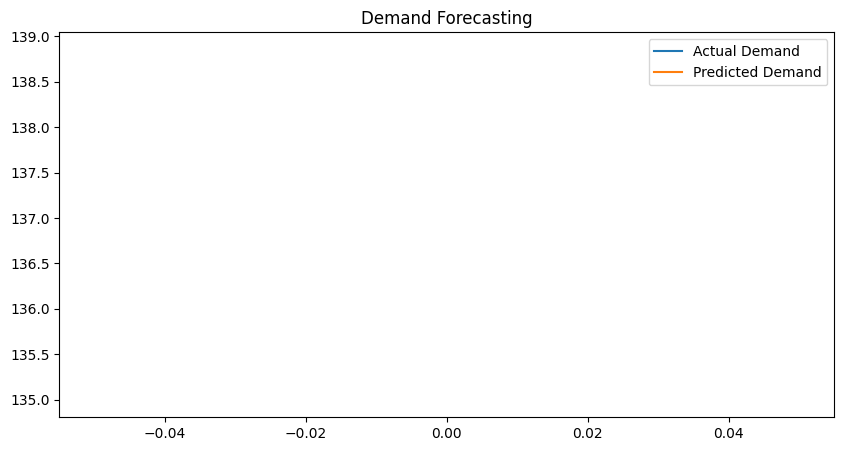

In [23]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Demand")
plt.plot(predictions, label="Predicted Demand")
plt.legend()
plt.title("Demand Forecasting")
plt.show()
